# Beer Wizard
### Programma che classifica per stile una birra in base alle caratteristiche fornite
\
Progetto d'esame di Programmazione di Applicazioni Data Intensive \
a.a. 2023/2024 \
DISI - Università di Bologna, Cesena \
**Realizzato da:**
* Martino Pagliarani 0001028890 martino.pagliarani@studio.unibo.it


### Inizializzazione dell'ambiente
Il primo passo è quello di analizzare i dati, per farlo è necessario importare le seguenti librerie:
* *numpy* &rarr; utilizzato per l'analisi numerica dei dati sotto forma di array
* *pandas* &rarr; utilizzato per l'analisi numerica dei dati sotto forma di tabelle
* *pyplot* &rarr; utilizzato per la visualizzazione dei dati sotto forma di grafici

In [514]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

### Caricamento dei dati
Carichiamo i dati da [Kaggle](https://www.kaggle.com/datasets/stephenpolozoff/top-beer-information?select=beer_data_set.csv "Title"). \
Al momento della scrittura, l'ultimo update del dataset risale al 2021 e contiene 5317 birre e le tutte le informazioni relative ad esse. Il dataset è stato ricavato dal sito: [BeerAdvocate](https://www.beeradvocate.com). \
Ogni birra contiene i seguenti dati:
* `Name` &rarr; nome della birra
* `key` &rarr; chiave univoca della birra
* `Style` &rarr; stile della birra
* `Style_key` &rarr; chiave univoca dello stile della birra
* `Brewery` &rarr; birrificio che produce la birra
* `Description` &rarr; descrizione della birra
* `ABV` &rarr; "Alcohol By Volume" gradazione alcolica della birra
* `Avg Rating` &rarr; valutazione media della birra
* `Min IBU` &rarr; valore minimo dell'indice di amarezza
* `Max IBU` &rarr; valore massimo dell'indice di amarezza
* `Astringency` &rarr; astringenza della birra
* `Body` &rarr; corpo della birra
* `Alcohol` &rarr; quanto si sente l'alcol nella birra
* `Bitter` &rarr; amarezza della birra
* `Sweet` &rarr; dolcezza della birra
* `Sour` &rarr; acidità della birra
* `Salty` &rarr; quanto è salata la birra
* `Fruits` &rarr; quanto è fruttata la birra
* `Hoppy` &rarr; quanto è luppolata la birra
* `Spices` &rarr; quanto è speziata la birra
* `Malty` &rarr; quanto è maltata la birra

In [515]:
import os.path
file = "./beer_data_set.csv"
if not os.path.exists(file):
    print("Missing dataset, download it manually from Kaggle: https://www.kaggle.com/datasets/stephenpolozoff/top-beer-information?select=beer_data_set.csv")

beer = pd.read_csv(file, index_col=1)

Per prima cosa vediamo se ci sono dei valori null e qualcosa ci siano li eliminiamo.

In [516]:
beer.isnull().sum()

Name           2
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [517]:
beer = beer.dropna()
print(beer.isnull().sum())

Name           0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64


In [518]:
beer.head(1)

,Name,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,,,,,
251,Amber,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111


Per il nostro specifico caso d'uso, non ci interessano tutti i dati presenti nel dataset, quindi rimuoviamo i dati non necessari.

In [519]:
beer.drop(columns=["Style Key", "Brewery", "Description"], inplace=True)

In [520]:
beer.head(1)

,Name,Style,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,,
251,Amber,Altbier,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111


Inoltre vogliamo creare una nuova variabile chiamata `Avg IBU` che rappresenta la media tra `Min IBU` e `Max IBU` e eliminare le due variabili. Rinominiamo anche la variabile `Ave Rating` in `Avg Rating`. Infine riordiniamo le colonne.

In [521]:
beer["Avg IBU"] = beer[["Min IBU", "Max IBU"]].mean(axis=1)
beer.drop(columns=["Min IBU", "Max IBU"], inplace=True)
beer = beer.rename(columns={"Ave Rating": "Avg Rating"})
beer = beer[["Name", "Style", "Avg IBU", "Avg Rating", "ABV", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"]]

In [522]:
beer.head()

,Name,Style,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,
251,Amber,Altbier,37.5,3.65,5.3,13,32,9,47,74,33,0,33,57,8,111
252,Double Bag,Altbier,37.5,3.90,7.2,12,57,18,33,55,16,0,24,35,12,84
253,Long Trail Ale,Altbier,37.5,3.58,5.0,14,37,6,42,43,11,0,10,54,4,62
254,Doppelsticke,Altbier,37.5,4.15,8.5,13,55,31,47,101,18,1,49,40,16,119
255,Scurry,Altbier,37.5,3.67,5.3,21,69,10,63,120,14,0,19,36,15,218


### Analisi esplorativa dei dati

Per prima cosa visualizziamo i dati in nostro possesso, in particolare quante birre distinte ci sono e quanti stili di birra sono presenti.

In [523]:
print("Numero di birre: ", beer["Name"].nunique())
print("Numero di stili: ", beer["Style"].nunique())

Numero di birre:  5317
Numero di stili:  112


Visualizziamo il numero di birre per ogni stile presente nel dataset.

In [524]:
beer.value_counts("Style")

Style
Altbier                           50
Lager - Märzen / Oktoberfest      50
Red Ale - Imperial                50
Red Ale - American Amber / Red    50
Quadrupel (Quad)                  50
                                  ..
Sour - Flanders Oud Bruin         49
Sour - Flanders Red Ale           49
Lager - European Pale             49
Sour - Gose                       49
Lambic - Faro                     16
Name: count, Length: 112, dtype: int64

In [525]:
beer.value_counts("Style").mean()

49.607142857142854

Notiamo che sono in media ci sono circa 50 birre per stile di birra.

Attraverso la funzione describe possiamo ottenere informazioni statistiche sulle variabili numeriche del nostro dataset.

In [526]:
beer.describe()

,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,29.590713,3.760481,6.634948,15.941505,42.752880,15.978402,34.322174,53.630490,34.619330,1.314435,39.386609,38.421166,17.588553,68.599172
std,17.336884,0.442848,2.521077,11.625370,28.592263,18.270748,27.121062,35.867233,39.854361,3.874765,36.655173,31.916471,23.976975,44.604752
min,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.590000,5.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,25.000000,3.820000,6.000000,14.000000,38.000000,10.000000,29.000000,49.500000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,37.500000,4.040000,7.900000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,62.000000,56.000000,22.000000,99.000000
max,82.500000,4.830000,57.500000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


Mostriamo ora la distribuzione delle birre in base alla gradazione alcolica.

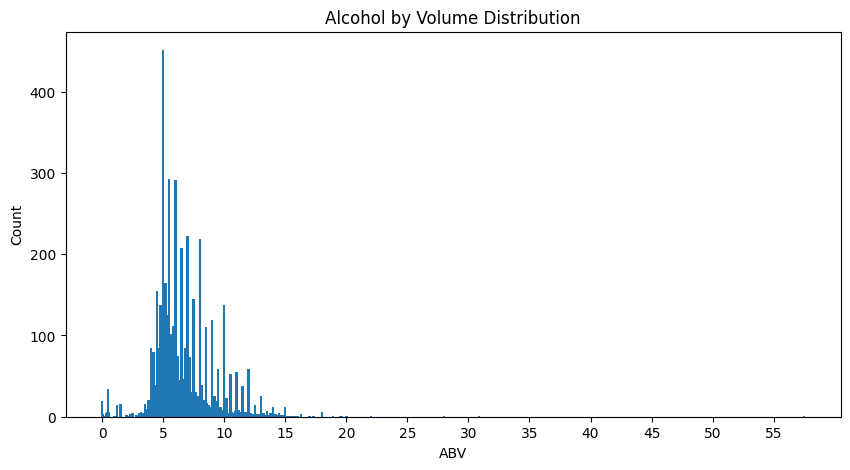

In [527]:
def plot_ABV():
    plt.figure(figsize=(10, 5))
    plt.bar(beer["ABV"].value_counts().index, beer["ABV"].value_counts().values, width=0.2)
    plt.xlabel("ABV")
    plt.xticks(np.arange(0, 60, 5)) # Rimuovo i valori di ABV superiori a 20% per una migliore visualizzazione
    plt.ylabel("Count")
    plt.title("Alcohol by Volume Distribution")
    plt.show()
    
plot_ABV()

Possiamo notare che la maggior parte delle birre ha gradazione alcolica compresa tra 5% e 10%. \
Inoltre, possiamo notare un caso limite di una birra con gradazione alcolica pari a 57.5%. \
D'ora un poi considereremo solo le birre con gradazione alcolica compresa tra 0% e 20%.

In [528]:
beer[beer["ABV"] == beer["ABV"].max()]

,Name,Style,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,,,
75,Schorschbock 57%,Bock - Eisbock,30.0,2.97,57.5,0,7,17,3,9,6,0,10,0,2,4


In [529]:
beer = beer[beer["ABV"] < 20]

Proviamo a vedere se esiste una correlazione tra la gradazione alcolica e la valutazione media della birra.
Per fare ciò utilizziamo un grafico di dispersione eliminando le birre con gradazione alcolica superiore al 20%.

<Axes: xlabel='ABV'>

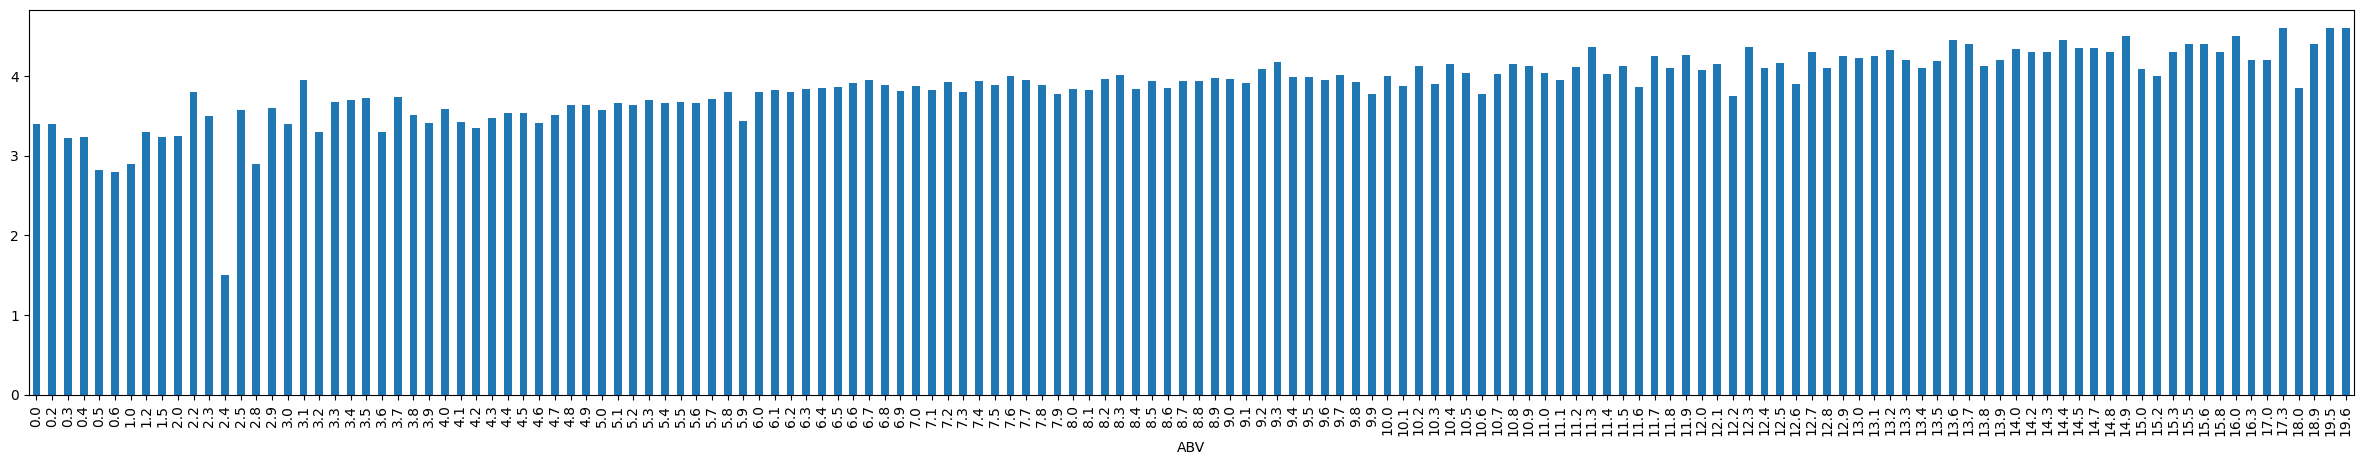

In [530]:
beer = beer.round(1)
beer.groupby("ABV")["Avg Rating"].mean().plot.bar(figsize=(30, 5))

Come si può notare, non esiste una correlazione significativa tra la gradazione alcolica e la valutazione media della birra.

Di seguito troviamo una funzione generica che ci permette di visualizzare le caratteristiche in un grafico a barre e in un grafico a torta.

In [531]:
def plot_characteristics(filter_type, filter_value):
    if filter_type not in ["Style", "Name"]:
        print("Invalid filter type. Please choose 'Style' or 'Name'.")
        return
    filtered_data = beer[beer[filter_type] == filter_value]
    filtered_data = filtered_data.drop(columns=["Name", "Style"])
    filtered_data = filtered_data.mean()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    cmap = plt.get_cmap("tab20")
    colors = cmap(np.arange(len(filtered_data)))
    
    filtered_data.plot(kind="bar", title=filter_type + ": " + filter_value, ax=axs[0], color=colors)
    filtered_data.plot(kind="pie", title=filter_type + ": " + filter_value, ax=axs[1], colors=colors)
    
    plt.tight_layout()
    plt.show()

Sfruttiamo la funzione per mostrare le caratteristiche generali di uno specifico stile di birra. \
Notiamo che le birre di stile "Red Ale - Imperial" sono piuttosto luppolate e maltate.

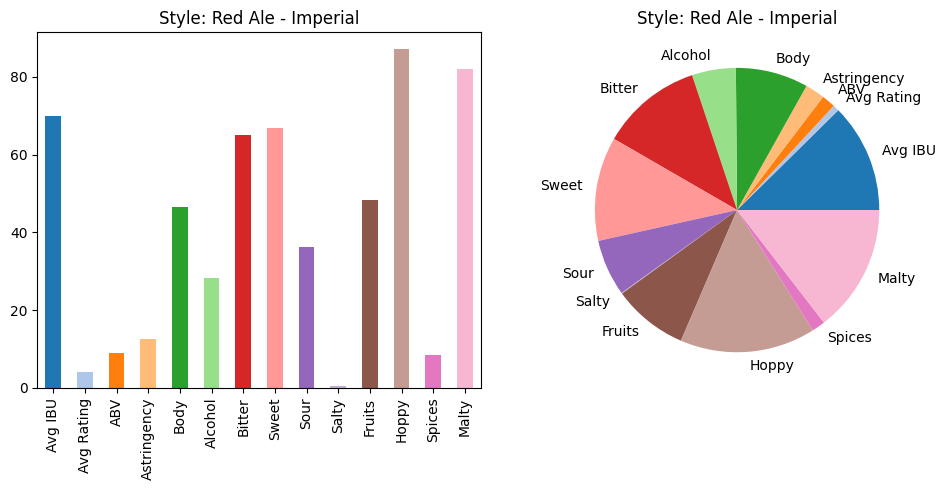

In [532]:
plot_characteristics("Style", "Red Ale - Imperial")

Invece, ora visualizziamo le caratteristiche di una birra specifica. \
Notiamo che la birra "Long Trail Ale" è molto speziata e maltata.

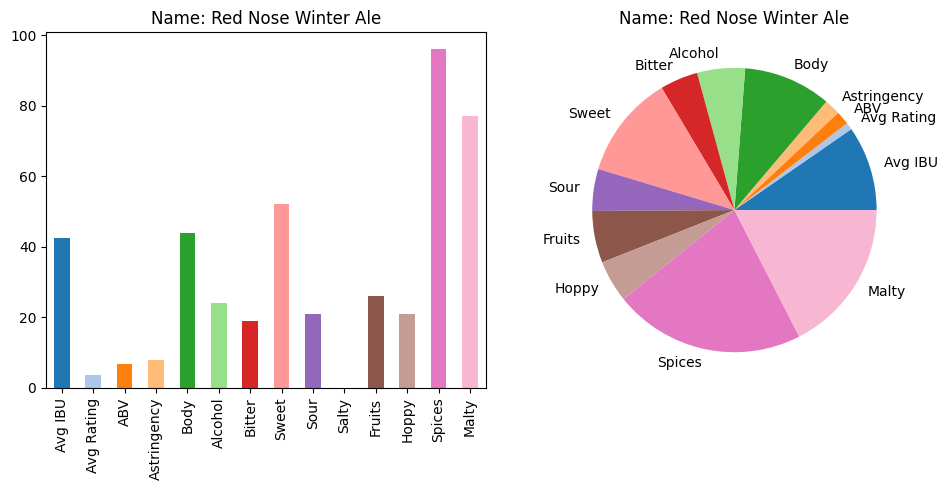

In [533]:
plot_characteristics("Name", "Red Nose Winter Ale")

### Preparazione dei dati

Dopo la fase di analisi espolorativa dei dati, prepariamo i dati per l'addestramento del modello. \
I dati che ci interessano sono le caratteristiche della birra e lo stile della birra. \
In particolare avremo bisongo di:
* `Style` &rarr; stile della birra
* `Avg IBU` &rarr; media tra `Min IBU` e `Max IBU`
* `Avg Rating` &rarr; valutazione media della birra
* `ABV` &rarr; gradazione alcolica della birra 
* `Astringency` &rarr; astringenza della birra
* `Body` &rarr; corpo della birra
* `Alcohol` &rarr; quanto si sente l'alcol nella birra
* `Bitter` &rarr; amarezza della birra
* `Sweet` &rarr; dolcezza della birra
* `Sour` &rarr; acidità della birra
* `Salty` &rarr; quanto è salata la birra
* `Fruits` &rarr; quanto è fruttata la birra
* `Hoppy` &rarr; quanto è luppolata la birra
* `Spices` &rarr; quanto è speziata la birra
* `Malty` &rarr; quanto è maltata la birra

Sapendo cosa ci interessa creiamo le due nuove variabile che ci serviranno per addestrare il modello:
* `y` &rarr; variabile target, rappresenta lo stile della birra
* `X` &rarr; variabile indipendente, rappresenta l'insieme delle caratteristiche della birra 

In [536]:
y = beer["Style"]
X = beer[[col for col in beer.columns if col != "Style" and col != "Name"]]

,Avg IBU,Avg Rating,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
key,,,,,,,,,,,,,,
251,37.5,3.6,5.3,13,32,9,47,74,33,0,33,57,8,111


A questo punto bisogna suddividere i dati in training set e validation set. \
Decidiamo di avere 1/3 dei dati nel validation set e 2/3 dei dati nel training set.

In [535]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42
)